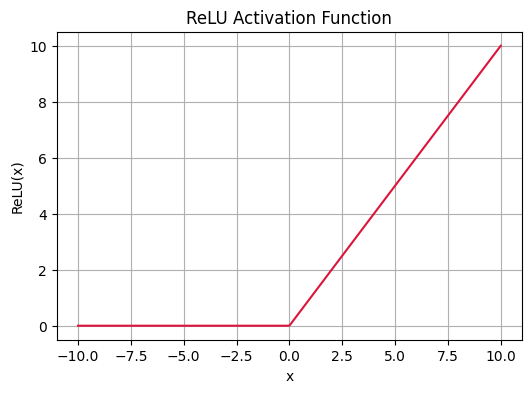

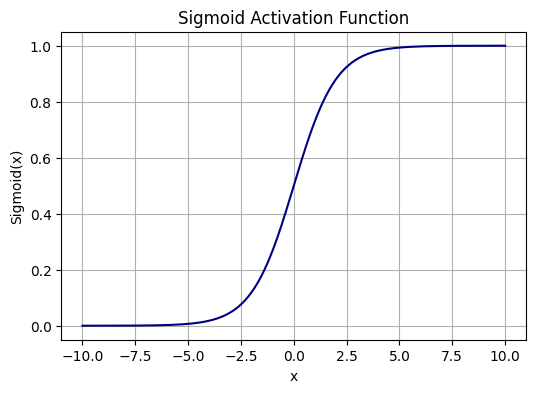

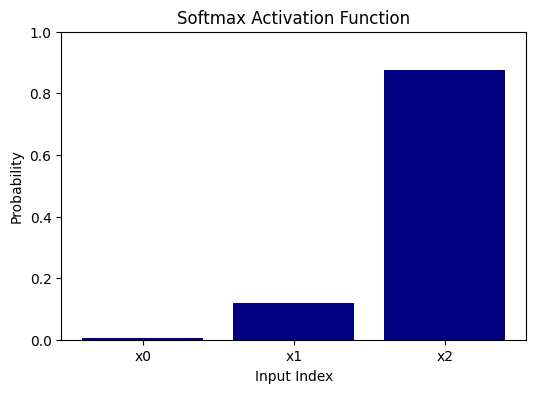

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define x range
x = np.linspace(-10, 10, 400)

# ReLU
def relu(x):
    return np.maximum(0, x)

plt.figure(figsize=(6, 4))
plt.plot(x, relu(x), color='crimson')
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.show()

# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.figure(figsize=(6, 4))
plt.plot(x, sigmoid(x), color='navy')
plt.title("Sigmoid Activation Function")
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.grid(True)
plt.show()

# Softmax (on a vector)
def softmax(x):
    e_x = np.exp(x - np.max(x))  # stability trick
    return e_x / e_x.sum()

x_softmax = np.array([-2, 1, 3])
softmax_vals = softmax(x_softmax)

plt.figure(figsize=(6, 4))
plt.bar(range(len(x_softmax)), softmax_vals, color='navy')
plt.xticks(range(len(x_softmax)), [f"x{i}" for i in range(len(x_softmax))])
plt.title("Softmax Activation Function")
plt.xlabel("Input Index")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.show()


In [2]:
# PREPARING TRAINING DATA

from DataPreparation import prepare_multi_dataset
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load data
train_data, train_labels, val_data, val_labels, test_data, test_labels = prepare_multi_dataset('./data/multi')
print(train_labels)
# Label encoding
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
val_labels = label_encoder.transform(val_labels)  # use transform, not fit_transform here!
test_labels = label_encoder.transform(test_labels)

# One-hot encoding
train_labels = to_categorical(train_labels, num_classes=24)
val_labels = to_categorical(val_labels, num_classes=24)
test_labels = to_categorical(test_labels, num_classes=24)

['C_Minor' 'G_Major' 'G_Minor' ... 'F#_Minor' 'B_Minor' 'F_Minor']


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from Model import create_cnn_model_2 

model = create_cnn_model_2(train_data)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels, epochs=50, batch_size=32, verbose=1, validation_data=(val_data, val_labels))

Epoch 1/50


c:\Users\Chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.1019 - loss: 3.0844 - val_accuracy: 0.5590 - val_loss: 1.4462
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.6767 - loss: 1.0798 - val_accuracy: 0.8603 - val_loss: 0.5229
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.8760 - loss: 0.3559 - val_accuracy: 0.8865 - val_loss: 0.3148
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9398 - loss: 0.1709 - val_accuracy: 0.9782 - val_loss: 0.1135
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.9820 - loss: 0.0929 - val_accuracy: 0.9825 - val_loss: 0.0767
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9871 - loss: 0.0446 - val_accuracy: 0.9869 - val_loss: 0.0752
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.9900 - loss: 0.0565 - val_accuracy: 0.9913 - val_loss: 0.0225
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9956 - loss: 0.0116 - val_accuracy: 0.9869 - val_loss: 0.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 171, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 83, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 39, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 34048)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,358,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,362,122 (50.97 MB)

 Trainable params: 4,454,040 (16.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,908,082 (33.98 MB)

8/8 - 0s - 22ms/step - accuracy: 0.9957 - loss: 0.0056


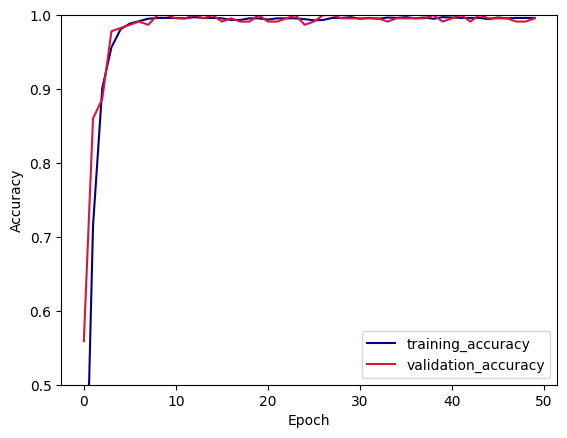

In [4]:
import numpy as np
import matplotlib.pylab as plt

model.summary()
plt.plot(history.history['accuracy'], label='training_accuracy', color="navy")
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy', color="crimson")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


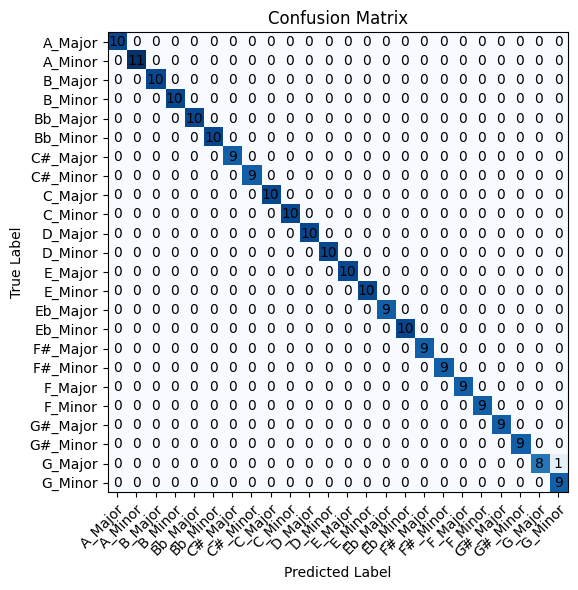

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(test_labels, axis=1)

cm = confusion_matrix(y_true, y_pred)
class_names = label_encoder.classes_

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, cmap='Blues')

ax.set_xticks(np.arange(len(class_names)))
ax.set_yticks(np.arange(len(class_names)))
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
fig.tight_layout()
plt.show()
